In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import pickle as pkl

from sklearn.metrics import mean_squared_error, mean_absolute_error

import sys
sys.path.insert(0, './libs')

import pitcher_model as pm
import batter_model as bm
import matchup_model as mm

In [3]:
def mape(y_true,y_pred):
    ape = np.abs((y_true - y_pred) / y_true)
    ape[~np.isfinite(ape)] = 1
    return np.mean(ape)

def wape(y_true,y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))

In [4]:
batters_train = pd.read_csv('data/train/batters_train.csv')
batters_test = pd.read_csv('data/test/batters_test.csv')

pitchers_train = pd.read_csv('data/train/pitchers_train.csv')
pitchers_test = pd.read_csv('data/test/pitchers_test.csv')

matchups_train = pd.read_csv('data/train/matchups_train.csv')
matchups_test = pd.read_csv('data/test/matchups_test.csv')

In [5]:
x_batter_train, y_batter_train, batter_train = bm.batter_prep(batters_train)
x_batter_test, y_batter_test, batter_test = bm.batter_prep(batters_test)

x_pitcher_train, y_pitcher_train, pitcher_train = pm.pitcher_prep(pitchers_train)
x_pitcher_test, y_pitcher_test, pitcher_test = pm.pitcher_prep(pitchers_test)

x_matchup_train, y_matchup_train = mm.matchup_prep(matchups_train)
x_matchup_test, y_matchup_test = mm.matchup_prep(matchups_test)

D:\Python\Anaconda3_2020.11\envs\env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
./libs\split_data.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: x.translate({ord(i): None for i in ' []'}).split(','))
./libs\split_data.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [6]:
with open(r"models/batter_recent_performance.pkl", "rb") as input_file:
            batters_model = pkl.load(input_file)
with open(r"models/pitcher_recent_performance.pkl", "rb") as input_file:
            pitchers_model = pkl.load(input_file)
with open(r"models/matchup.pkl", "rb") as input_file:
            matchups_model = pkl.load(input_file)

# Train Results

In [7]:
batters_pred = batters_model.predict(x_batter_train)
pitchers_pred = pitchers_model.predict(x_pitcher_train)
matchup_pred = matchups_model.predict(x_matchup_train)

### Batters

In [8]:
print('mae: ' + str(mean_absolute_error(y_batter_train,batters_pred)))
print('mse: ' + str(mean_squared_error(y_batter_train,batters_pred)))
print('mape: ' + str(mape(y_batter_train['next_estimated_ba_using_speedangle'],batters_pred)))
print('wape: ' + str(wape(y_batter_train['next_estimated_ba_using_speedangle'],batters_pred)))

mape: 2.144527107022311
wape: 0.5692661606748338
mse: 0.02933120482038039
mae: 0.13605566396424357


### Pitchers

In [9]:
print('mae: ' + str(mean_absolute_error(y_pitcher_train,pitchers_pred)))
print('mse: ' + str(mean_squared_error(y_pitcher_train,pitchers_pred)))
print('mape: ' + str(mape(y_pitcher_train['estimated_ba_using_speedangle'],pitchers_pred)))
print('wape: ' + str(wape(y_pitcher_train['estimated_ba_using_speedangle'],pitchers_pred)))

mape: 1.3956056769021477
wape: 0.4047759766184156
mse: 0.014647970355475017
mae: 0.09155517066993615


### Matchups

In [10]:
print('mae: ' + str(mean_absolute_error(y_matchup_train,matchup_pred)))
print('mse: ' + str(mean_squared_error(y_matchup_train,matchup_pred)))
print('mape: ' + str(mape(y_matchup_train['estimated_ba_using_speedangle'],matchup_pred)))
print('wape: ' + str(wape(y_matchup_train['estimated_ba_using_speedangle'],matchup_pred)))

mape: 2.7311287967186906
wape: 0.8502062272857245
mse: 0.06481339331729921
mae: 0.20671633308939208


### Storing Prediction

In [11]:
y_batter_train['batter_predicted'] = batters_pred
y_pitcher_train['pitcher_predicted'] = pitchers_pred
matchup_train_pred = matchup_pred

# Test Results

In [12]:
batters_pred = batters_model.predict(x_batter_test)
pitchers_pred = pitchers_model.predict(x_pitcher_test)
matchup_pred = matchups_model.predict(x_matchup_test)

### Batters

In [13]:
print('mae: ' + str(mean_absolute_error(y_batter_test,batters_pred)))
print('mse: ' + str(mean_squared_error(y_batter_test,batters_pred)))
print('mape: ' + str(mape(y_batter_test['next_estimated_ba_using_speedangle'],batters_pred)))
print('wape: ' + str(wape(y_batter_test['next_estimated_ba_using_speedangle'],batters_pred)))

mape: 2.588798700036617
wape: 0.5396651779121011
mse: 0.025725470643104795
mae: 0.12781449069327225


### Pitchers

In [14]:
print('mae: ' + str(mean_absolute_error(y_pitcher_test,pitchers_pred)))
print('mse: ' + str(mean_squared_error(y_pitcher_test,pitchers_pred)))
print('mape: ' + str(mape(y_pitcher_test['estimated_ba_using_speedangle'],pitchers_pred)))
print('wape: ' + str(wape(y_pitcher_test['estimated_ba_using_speedangle'],pitchers_pred)))

mape: 1.571893422959928
wape: 0.39966059286207095
mse: 0.013898000434932526
mae: 0.08924543742684475


### Matchups

In [15]:
print('mae: ' + str(mean_absolute_error(y_matchup_test,matchup_pred)))
print('mse: ' + str(mean_squared_error(y_matchup_test,matchup_pred)))
print('mape: ' + str(mape(y_matchup_test['estimated_ba_using_speedangle'],matchup_pred)))
print('wape: ' + str(wape(y_matchup_test['estimated_ba_using_speedangle'],matchup_pred)))

mape: 3.554567865257817
wape: 0.8488304348234862
mse: 0.06210995797435579
mae: 0.20132882419494624


### Storing Prediction

In [16]:
y_batter_test['batter_predicted'] = batters_pred
y_pitcher_test['pitcher_predicted'] = pitchers_pred
matchup_test_pred = matchup_pred

# Combined Model

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [19]:
model_combined = RandomForestRegressor(n_estimators=1600,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)

In [18]:
import pickle as pkl

with open(r"models/combined_model.pkl", "rb") as input_file:
        model_combined = pkl.load(input_file)

In [19]:
x_train_c = x_matchup_train.copy()
y_train_c = y_matchup_train

x_test_c = x_matchup_test.copy()
y_test_c = y_matchup_test

In [20]:
x_train_c = x_train_c.join(y_batter_train['batter_predicted'],on=['batter','game_date'])
x_test_c = x_test_c.join(y_batter_test['batter_predicted'],on=['batter','game_date'])

x_train_c = x_train_c.join(y_pitcher_train['pitcher_predicted'],on=['pitcher','game_date'])
x_test_c = x_test_c.join(y_pitcher_test['pitcher_predicted'],on=['pitcher','game_date'])

In [21]:
x_train_c = x_train_c.join(y_train_c)
x_train_c.dropna(inplace=True)
y_train_c = x_train_c.loc[:,'estimated_ba_using_speedangle']
x_train_c.drop('estimated_ba_using_speedangle',axis=1,inplace=True)

In [22]:
x_test_c = x_test_c.join(y_test_c)
x_test_c.dropna(inplace=True)
y_test_c = x_test_c.loc[:,'estimated_ba_using_speedangle']
x_test_c.drop('estimated_ba_using_speedangle',axis=1,inplace=True)

In [32]:
model_combined.fit(x_train_c,y_train_c)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=1600)

In [29]:
combined_pred_train = model_combined.predict(x_train_c)
combined_pred_test = model_combined.predict(x_test_c)

In [30]:
print('Train')
print('    mae: ' + str(mean_absolute_error(y_train_c,combined_pred_train)))
print('    mse: ' + str(mean_squared_error(y_train_c,combined_pred_train)))
print('    mape: ' + str(mape(y_train_c,combined_pred_train)))
print('    wape: ' + str(wape(y_train_c,combined_pred_train)))
print('Test')
print('    mae: ' + str(mean_absolute_error(y_test_c,combined_pred_test)))
print('    mse: ' + str(mean_squared_error(y_test_c,combined_pred_test)))
print('    mape: ' + str(mape(y_test_c,combined_pred_test)))
print('    wape: ' + str(wape(y_test_c,combined_pred_test)))

Train
    mape: 2.714643208848955
    wape: 0.7935591285554326
    mse: 0.05952107760347163
    mae: 0.1970458429805675
Test
    mape: 3.49512135956637
    wape: 0.7990324582633201
    mse: 0.058452845335430624
    mae: 0.19458962476426953


# Stacked Model

In [31]:
x_train = x_matchup_train.copy()
y_train = y_matchup_train

x_test = x_matchup_test.copy()
y_test = y_matchup_test

In [32]:
x_train = x_train.join(y_batter_train['batter_predicted'],on=['batter','game_date'])
x_test = x_test.join(y_batter_test['batter_predicted'],on=['batter','game_date'])

x_train = x_train.join(y_pitcher_train['pitcher_predicted'],on=['pitcher','game_date'])
x_test = x_test.join(y_pitcher_test['pitcher_predicted'],on=['pitcher','game_date'])

x_train['matchup_predicted'] = matchup_train_pred
x_test['matchup_predicted'] = matchup_test_pred

In [33]:
x_train = x_train.join(y_train)
x_train.dropna(inplace=True)
y_train = x_train.loc[:,'estimated_ba_using_speedangle']
x_train.drop('estimated_ba_using_speedangle',axis=1,inplace=True)

In [34]:
x_test = x_test.join(y_test)
x_test.dropna(inplace=True)
y_test = x_test.loc[:,'estimated_ba_using_speedangle']
x_test.drop('estimated_ba_using_speedangle',axis=1,inplace=True)

In [35]:
x_train = x_train.loc[:,x_train.columns.isin(['pitcher_predicted','batter_predicted','matchup_predicted'])]
x_test = x_test.loc[:,x_test.columns.isin(['pitcher_predicted','batter_predicted','matchup_predicted'])]

In [36]:
import pickle as pkl

with open('models/stacked_model.pkl','rb') as input_file:
    model_stacked = pkl.load(input_file)
    
model_stacked.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [37]:
rf = RandomForestRegressor()
model_stacked = RandomForestRegressor(n_estimators=1600, min_samples_split=2, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)

model_stacked.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=1600)

In [38]:
stacked_pred_train = model_stacked.predict(x_train)
stacked_pred_test = model_stacked.predict(x_test)

In [39]:
print('Train')
print('    mae: ' + str(mean_absolute_error(y_train,stacked_pred_train)))
print('    mse: ' + str(mean_squared_error(y_train,stacked_pred_train)))
print('    mape: ' + str(mape(y_train,stacked_pred_train)))
print('    wape: ' + str(wape(y_train,stacked_pred_train)))
print('Test')
print('    mae: ' + str(mean_absolute_error(y_test,stacked_pred_test)))
print('    mse: ' + str(mean_squared_error(y_test,stacked_pred_test)))
print('    mape: ' + str(mape(y_test,stacked_pred_test)))
print('    wape: ' + str(wape(y_test,stacked_pred_test)))

Train
    mape: 2.675796659943307
    wape: 0.7652834486288771
    mse: 0.057496076570361425
    mae: 0.19002480952951362
Test
    mape: 3.433062135413093
    wape: 0.7871117141321412
    mse: 0.059494836951755954
    mae: 0.19168654729425197


# Batter Performance Output Against Matchup Results

In [40]:
print('Train')
print('    mae: ' + str(mean_absolute_error(y_train,x_train['batter_predicted'])))
print('    mse: ' + str(mean_squared_error(y_train,x_train['batter_predicted'])))
print('    mape: ' + str(mape(y_train,x_train['batter_predicted'])))
print('    wape: ' + str(wape(y_train,x_train['batter_predicted'])))
print('Test')
print('    mae: ' + str(mean_absolute_error(y_test,x_test['batter_predicted'])))
print('    mse: ' + str(mean_squared_error(y_test,x_test['batter_predicted'])))
print('    mape: ' + str(mape(y_test,x_test['batter_predicted'])))
print('    wape: ' + str(wape(y_test,x_test['batter_predicted'])))

Train
    mape: 2.7199143279064986
    wape: 0.8478204198329026
    mse: 0.06690274983645719
    mae: 0.21051927110487934
Test
    mape: 3.451962864212598
    wape: 0.8350204919044314
    mse: 0.06262836090872918
    mae: 0.20335384690544311


# Pitcher Performance Output Against Matchup Results

In [41]:
print('Train')
print('    mae: ' + str(mean_absolute_error(y_train,x_train['pitcher_predicted'])))
print('    mse: ' + str(mean_squared_error(y_train,x_train['pitcher_predicted'])))
print('    mape: ' + str(mape(y_train,x_train['pitcher_predicted'])))
print('    wape: ' + str(wape(y_train,x_train['pitcher_predicted'])))
print('Test')
print('    mae: ' + str(mean_absolute_error(y_test,x_test['pitcher_predicted'])))
print('    mse: ' + str(mean_squared_error(y_test,x_test['pitcher_predicted'])))
print('    mape: ' + str(mape(y_test,x_test['pitcher_predicted'])))
print('    wape: ' + str(wape(y_test,x_test['pitcher_predicted'])))

Train
    mape: 2.6864954840814406
    wape: 0.8057044234707169
    mse: 0.06307624881460694
    mae: 0.20006159793657968
Test
    mape: 3.4338882757574534
    wape: 0.7989574973920388
    mse: 0.05963957755135279
    mae: 0.19457136942599912


# Results when Plate Appearance Total is Taken into Account

In [203]:
pa_df = matchups_train.set_index(['pitcher','batter','game_date'])[['pa','estimated_ba_using_speedangle']].copy()
pa_df.index = pa_df.index.set_levels([pa_df.index.levels[0], pa_df.index.levels[1], pd.to_datetime(pa_df.index.levels[2])])
train_results = x_train.join(pa_df,on=['pitcher','batter','game_date'])

pa_df = matchups_test.set_index(['pitcher','batter','game_date'])[['pa','estimated_ba_using_speedangle']].copy()
pa_df.index = pa_df.index.set_levels([pa_df.index.levels[0], pa_df.index.levels[1], pd.to_datetime(pa_df.index.levels[2])])
test_results = x_test.join(pa_df,on=['pitcher','batter','game_date'])

In [204]:
train_results['stacked_predicted'] = stacked_pred_train
test_results['stacked_predicted'] = stacked_pred_test

In [205]:
x_train_c['combined_predicted'] = combined_pred_train
x_test_c['combined_predicted'] = combined_pred_test

train_results = train_results.join(x_train_c['combined_predicted'].to_frame())
test_results = test_results.join(x_test_c['combined_predicted'].to_frame())

In [206]:
test_results.columns

Index(['batter_predicted', 'pitcher_predicted', 'matchup_predicted', 'pa',
       'estimated_ba_using_speedangle', 'stacked_predicted',
       'combined_predicted'],
      dtype='object')

The metric below was created to weigh mae against plate appearance for most contribution of plate appearances over a season.

In [165]:
def wmae(true,pred,weights):
    return np.average(abs(true-pred),weights=weights)

In [168]:
def list_elements(data, element, target='estimated_ba_using_speedangle'):
    wmae_in = []
    wape_in = []
    mae_in = []
    mse_in = []
    count_in = []
    
    for i in range(1,data['pa'].max()+1):
        mask = (data['pa'] == i)
        
        true_outcome = data.loc[mask,target]
        predictor = data.loc[mask,element]
        weights = data.loc[mask,'pa']
        
        mae_in.append(mean_absolute_error(true_outcome,predictor))
        mse_in.append(mean_squared_error(true_outcome,predictor))
        wmae_in.append(wmae(true_outcome,predictor,weights))
        wape_in.append(wape(true_outcome,predictor))
        
        count_in.append(predictor.count())
        
    return {'wmae': wmae_in, 'wape': wape_in, 'mae': mae_in, 'mse': mse_in, 'count': count_in}

In [134]:
def plot_values(data,target='estimated_ba_using_speedangle'):
    pred_cols = data.loc[:,~data.columns.isin([target,'pa'])]
    out_dict = {}
    
    for elem in pred_cols:
        out_dict[elem] = list_elements(data,elem,target)
        
    out_dict['count_total'] = sum(out_dict[elem]['count'])
    out_dict['count'] = [(item / out_dict['count_total']) for item in out_dict[elem]['count']]
    
    return out_dict

In [135]:
import matplotlib.pyplot as plt

In [164]:
def plot_results(data,max_pa=4):
    plt.figure(figsize=(20,20))
    plot_val = plot_values(data)
    
    plot_elems = list(plot_val[list(plot_val.keys())[0]].keys())
    plot_elems.remove('count')
    
    x = [j for j in range(1,max_pa+1)]
    
    for i in range(0,4):
        plt.subplot(2,2,i+1)
        
        plot_metric = plot_elems[i]
        
        for prediction in list(plot_val.keys()):
            if 'count' not in prediction:
                plt.plot(x,plot_val[prediction][plot_metric],label=prediction)
            
        #plt.plot(x,plot_val['count'],label='count_percent_of_pa (total = ' + str(plot_val['count_total']) + '')
        plt.xlabel('Number of At Bats in Matchup')
        plt.title(plot_metric + ' - ' + 'Total Matchups: ' + str(plot_val['count_total']))
        plt.legend()
        
    plt.show()

In [169]:
temp = plot_values(train_results)
train_abs = temp['batter_predicted']['count']
train_total = temp['count_total']
train_per_pa = temp['count']

temp = plot_values(test_results)
test_abs = temp['batter_predicted']['count']
test_total = temp['count_total']
test_per_pa = temp['count']

In [145]:
x = [j for j in range(1,5)]

## At Bat Totals By pa in Matchup

In [150]:
print('Totals by pa - Training Data')
for i in range(len(train_abs)):
    print('   ' + str(i+1) + ': ' + str(train_abs[i]) + ' - ' + str(train_per_pa[i]) + '% of plate appearances')
print('Totals by pa - Test Data')
for i in range(len(test_abs)):
    print('   ' + str(i+1) + ': ' + str(test_abs[i]) + ' - ' + str(test_per_pa[i]) + '% of plate appearances')

Totals by pa - Training Data
   1: 140749 - 0.6433622372252263% of plate appearances
   2: 35237 - 0.16106796604668808% of plate appearances
   3: 40784 - 0.1864232462255052% of plate appearances
   4: 2001 - 0.009146550502580324% of plate appearances
Totals by pa - Test Data
   1: 16884 - 0.643126499828591% of plate appearances
   2: 4331 - 0.16497162229078582% of plate appearances
   3: 4829 - 0.18394088294671085% of plate appearances
   4: 209 - 0.007960994933912315% of plate appearances


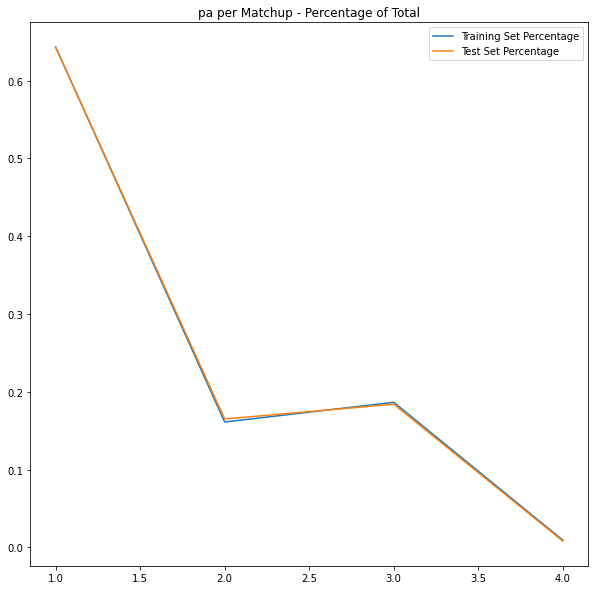

In [153]:
plt.figure(figsize = (10,10))

plt.plot(x,train_per_pa,label='Training Set Percentage')
plt.plot(x,test_per_pa,label='Test Set Percentage')
plt.title('pa per Matchup - Percentage of Total')
plt.legend()

## Train Results

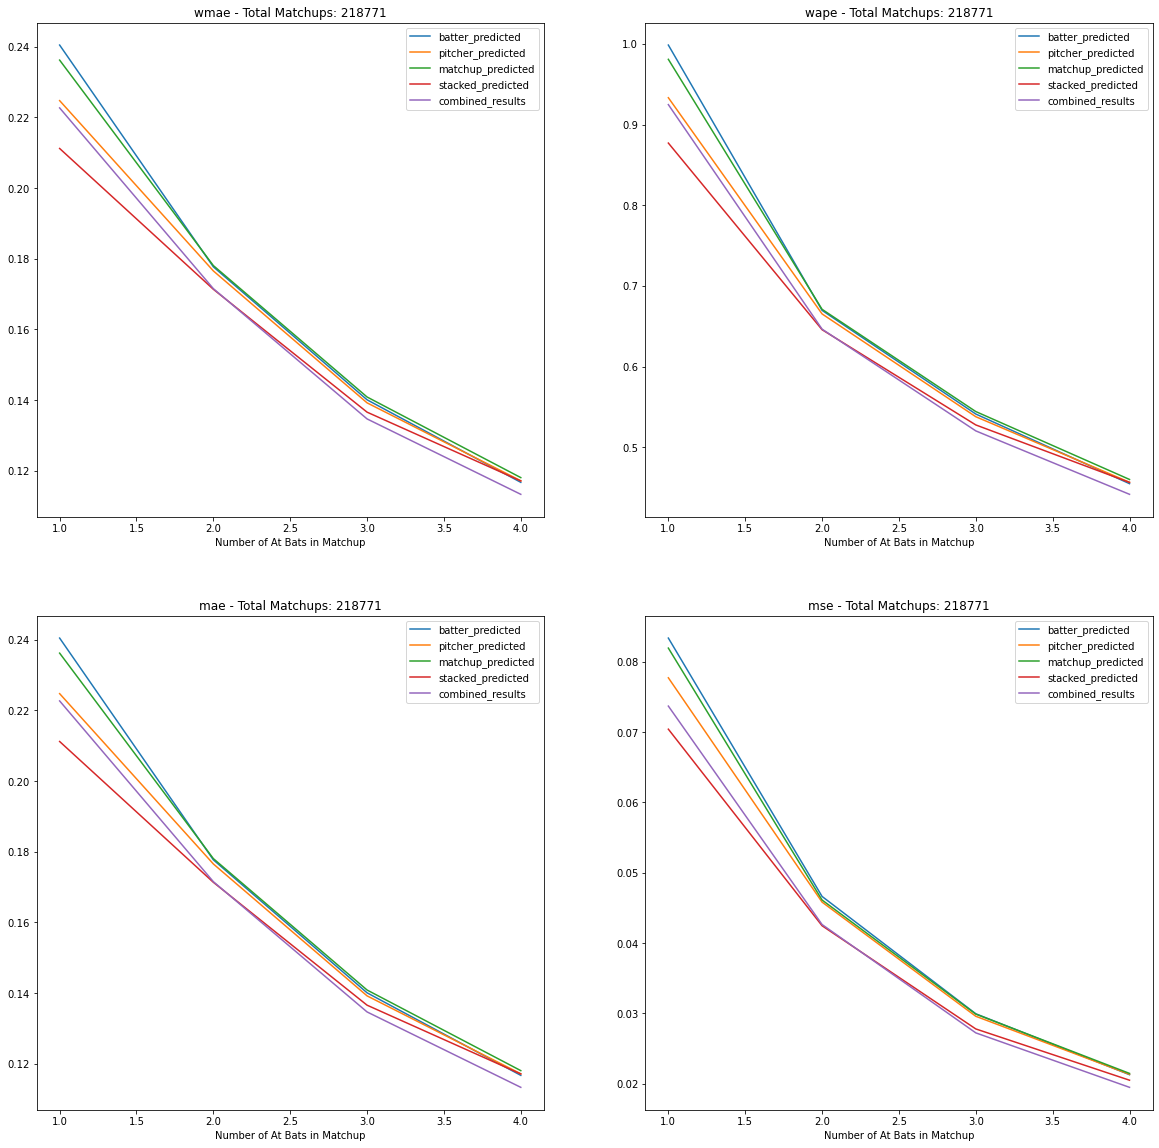

In [171]:
plot_results(train_results)

## Test Results

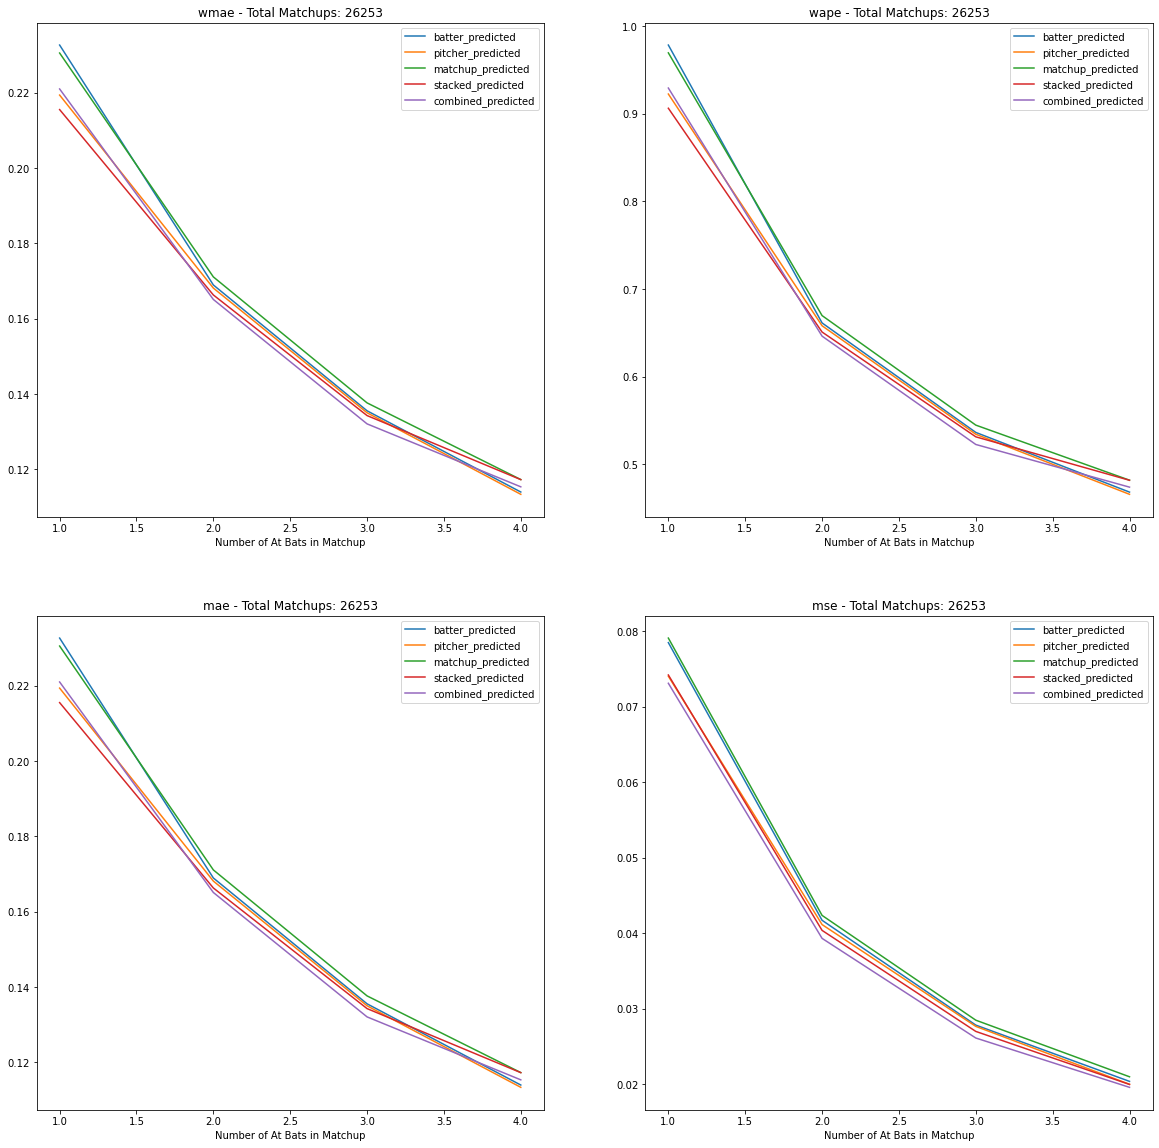

In [213]:
plot_results(test_results)

In [173]:
def results_pa(data,pa_max=4):
    plot_val = plot_values(data)
    
    eval_metrics = list(plot_val[list(plot_val.keys())[0]].keys())
    eval_metrics.remove('count')
    
    models_predictive = list(plot_val.keys())
    models_predictive.remove('count')
    models_predictive.remove('count_total')
    
    for eval_metric in eval_metrics:
        print(eval_metric)
        
        for i in range(pa_max):
            print("   " + str(i+1) + " pa per Matchup")
            
            for m in models_predictive:
                print('      ' + m + ': ' + str(plot_val[m][eval_metric][i]))

# Printed Evaluation Metrics - Train Set

In [175]:
results_pa(train_results)

wmae
   1 pa per Matchup
      batter_predicted: 0.24046474830554612
      pitcher_predicted: 0.22474534096547322
      matchup_predicted: 0.2362080264930994
      stacked_predicted: 0.2112089981647385
      combined_results: 0.22268493608720855
   2 pa per Matchup
      batter_predicted: 0.17772785691107942
      pitcher_predicted: 0.17656430140602639
      matchup_predicted: 0.1780783614096095
      stacked_predicted: 0.1713727294469097
      combined_results: 0.17155279373783522
   3 pa per Matchup
      batter_predicted: 0.1401068054367008
      pitcher_predicted: 0.13924304351280983
      matchup_predicted: 0.14089747847347472
      stacked_predicted: 0.13660728686895657
      combined_results: 0.1346946782703209
   4 pa per Matchup
      batter_predicted: 0.11675469901156565
      pitcher_predicted: 0.11719603766291246
      matchup_predicted: 0.11808984114250787
      stacked_predicted: 0.11714636067373875
      combined_results: 0.11336356514060371
wape
   1 pa per Matchup
    

# Printed Evaluation Metrics - Test Set

In [176]:
results_pa(test_results)

wmae
   1 pa per Matchup
      batter_predicted: 0.2326759684319382
      pitcher_predicted: 0.21939011533467023
      matchup_predicted: 0.23056078384473938
      stacked_predicted: 0.21553758663706765
      combined_results: 0.22101262319856188
   2 pa per Matchup
      batter_predicted: 0.16896353055526994
      pitcher_predicted: 0.16813453625614425
      matchup_predicted: 0.1711039930479879
      stacked_predicted: 0.1663098789955017
      combined_results: 0.16511289948290922
   3 pa per Matchup
      batter_predicted: 0.1355447350023211
      pitcher_predicted: 0.13502086159473567
      matchup_predicted: 0.1376474404194088
      stacked_predicted: 0.1342749894245271
      combined_results: 0.13207108776338689
   4 pa per Matchup
      batter_predicted: 0.11397567293144283
      pitcher_predicted: 0.11336381370260305
      matchup_predicted: 0.11728494570166255
      stacked_predicted: 0.11726460992912967
      combined_results: 0.11535425063146224
wape
   1 pa per Matchup
    

# Weighted MAE Comparison

In [183]:
def wmae_print(data,target='estimated_ba_using_speedangle'):
    wmae_columns = [item for item in data.columns if 'predicted' in item]
    
    for item in wmae_columns:
        print(item + ': ' + str(wmae(data.loc[:,target],data.loc[:,item],data.loc[:,'pa'])))

In [186]:
train_results

batter_predicted  pitcher_predicted  \
pitcher  batter   game_date                                         
571882.0 592808.0 2017-04-24          0.249975           0.178420   
         571771.0 2017-04-24          0.258798           0.178420   
543331.0 592669.0 2017-04-24          0.244932           0.078543   
         500208.0 2017-04-24          0.252200           0.078543   
502042.0 592518.0 2017-04-24          0.251155           0.253439   
...                                        ...                ...   
593958.0 657041.0 2021-10-01          0.240861           0.235708   
         665742.0 2021-10-01          0.256503           0.235708   
593974.0 622534.0 2021-10-01          0.253797           0.186700   
         642336.0 2021-10-01          0.235610           0.186700   
593958.0 605137.0 2021-10-01          0.253924           0.235708   

                              matchup_predicted  pa  \
pitcher  batter   game_date                           
571882.0 592808.0 2017-04-24           0.230348   1   
         571771.0 2017-04-24           0.230960   1   
543331.0 592669.0 2017-04-24           0.229528   1   
         500208.0 2017-04-24           0.229200   1   
502042.0 592518.0 2017-04-24           0.250720   3   
...                                         ...  ..   
593958.0 657041.0 2021-10-01           0.252842   3   
         665742.0 2021-10-01           0.273631   1   
593974.0 622534.0 2021-10-01           0.231886   1   
         642336.0 2021-10-01           0.223862   1   
593958.0 605137.0 2021-10-01           0.263389   2   

                              estimated_ba_using_speedangle  \
pitcher  batter   game_date                                   
571882.0 592808.0 2017-04-24                       0.000000   
         571771.0 2017-04-24                       0.360000   
543331.0 592669.0 2017-04-24                       0.000000   
         500208.0 2017-04-24                       0.000000   
502042.0 592518.0 2017-04-24                       0.255667   
...                                                     ...   
593958.0 657041.0 2021-10-01                       0.329333   
         665742.0 2021-10-01                       0.000000   
593974.0 622534.0 2021-10-01                       0.000000   
         642336.0 2021-10-01                       0.834000   
593958.0 605137.0 2021-10-01                       0.170000   

                              stacked_predicted  combined_results  
pitcher  batter   game_date                                        
571882.0 592808.0 2017-04-24           0.178356          0.187118  
         571771.0 2017-04-24           0.210889          0.228547  
543331.0 592669.0 2017-04-24           0.035515          0.137202  
         500208.0 2017-04-24           0.037510          0.148136  
502042.0 592518.0 2017-04-24           0.280200          0.269065  
...                                         ...               ...  
593958.0 657041.0 2021-10-01           0.226654          0.230092  
         665742.0 2021-10-01           0.290827          0.260435  
593974.0 622534.0 2021-10-01           0.207815          0.220974  
         642336.0 2021-10-01           0.152306          0.179671  
593958.0 605137.0 2021-10-01           0.272633          0.258043  

[218771 rows x 7 columns]

## Train

In [207]:
wmae_print(train_results)

batter_predicted: 0.1886744159239546
pitcher_predicted: 0.18165805426613155
matchup_predicted: 0.18730723299016994
stacked_predicted: 0.17406395373121147
combined_predicted: 0.17805608338432516


## Test

In [208]:
wmae_print(test_results)

batter_predicted: 0.1823138171040129
pitcher_predicted: 0.1764511837955322
matchup_predicted: 0.18270669079690757
stacked_predicted: 0.17428828134608534
combined_predicted: 0.17547615716953108


In [212]:
matchups_test['game_date'].max()

'2022-07-27'